In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

# 1 POSITIVE, 0 NEGATIVE

In [3]:
movie_data = load_files(r"C:\Users\ifoa\Desktop\txt_sentoken")
X_, y = movie_data.data, movie_data.target

In [4]:
print(X_[1], y[1])

b'wolfgang petersen\'s latest , the perfect storm , is like a pineapple . \nit only tastes good after arduous peeling and digging - if you try to eat the fruit , spikes and all , it\'s going to hurt ? quite a bit . \nok , maybe that was a confusing analogy , so here\'s my main complaint about the latest man battles nature flick : there isn\'t really much of a story to tell . \nbasically , a massachusetts fishing crew goes out to sea on a small boat , called the andrea gail , and gets stuck in the middle of " the storm of the century . " \nhow much time does it take for petersen to tell this story ? \nnot nearly enough . \nso he spends the majority of the film developing pointless side stories which all eventually become superfluous . \naudiences want to see the storm , they want to see a fight for survival but what they get is a lot of cliched , maudlin drivel . \nthe last quarter of the perfect storm is utterly perfect in every aspect , but just try lasting the first three-quarters . 

In [5]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 999]
 [  1 414]]


In [6]:
type(X_)

list

In [7]:
# patterns = [r"b'",
#             r'b"',
#             r"b\\",
#             r"\\n",
#             r'\\',
#             r'"',
#             r",",
#             r"'",
#             r"\?",
#             r"\!",
#             r'\.',
#             r"\*",
#             r":",
#             r"-",
#             r"[()]",
#             r"\)",
#             r"/",
#             r"[0-9]+"
#             r"[^a-zA-z\s]+",
#             r"[0-9]",
#             r"`"
#             ]

# patterns = [
#             r"b'",
#             r'b"',
#             r"b\\",
#             r"\\n",
#             r"[^a-zA-Z\s]"
#             ]
# patterns = [r"-"]
patterns = [r"b'",
            r'b"',
            r"b\\",
            r"\\n",
            r'[^\w\s]', 
            r'[!@#$%<.*?>]+',#Remove simbols Remove HTML tags/markups
            r"[0-9]"
            ] 
rem_spaces = r" +"

X =[]

for doc in X_:
    docx = str(doc)
    for pattern in patterns:
        matches = re.findall(pattern, str(doc))
        if matches:
            for match in matches:
                docx = docx.replace(match, '')
        # docx = str(doc).replace(match,'')
        # print(docx)
        space_match = re.findall(rem_spaces, docx)
        for sm in space_match:
            docx = docx.replace(sm, ' ')
    docx = docx.strip()
    X.append(docx)
    

In [8]:
X[0]

'lisa cholodenkos high art is an intelligent quiet drama its strongest quality aside from the topnotch central performances is the perceptive way in which the film also written by cholodenko observes its characters they are all flawed people some more troubled than others but they are not judged judging the characters in this picture would be a creative misstep on the filmmakers parts because no one no matter how bad off they are deserve to be negatively judged if they are involved in some serious problems that they cannot break free of syd radha mitchell a yearold woman living with her longtime boyfriend james gabriel mann has recently been awarded an ideal job at the highprofile photography magazine frame she very much enjoys where her career is headed but is often not taken very seriously by her managers who are always giving her petty jobs to do when she knows she could be doing more important things one night while taking a bath syd notices a leak coming from the apartment above h

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidfconverter = TfidfTransformer()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [11]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(1130, 1500) (1130,)


In [12]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(283, 1500) (283,)


In [13]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       202
           1       0.95      0.26      0.41        81

    accuracy                           0.78       283
   macro avg       0.86      0.63      0.64       283
weighted avg       0.82      0.78      0.74       283

0.6380087651240327


<Axes: >

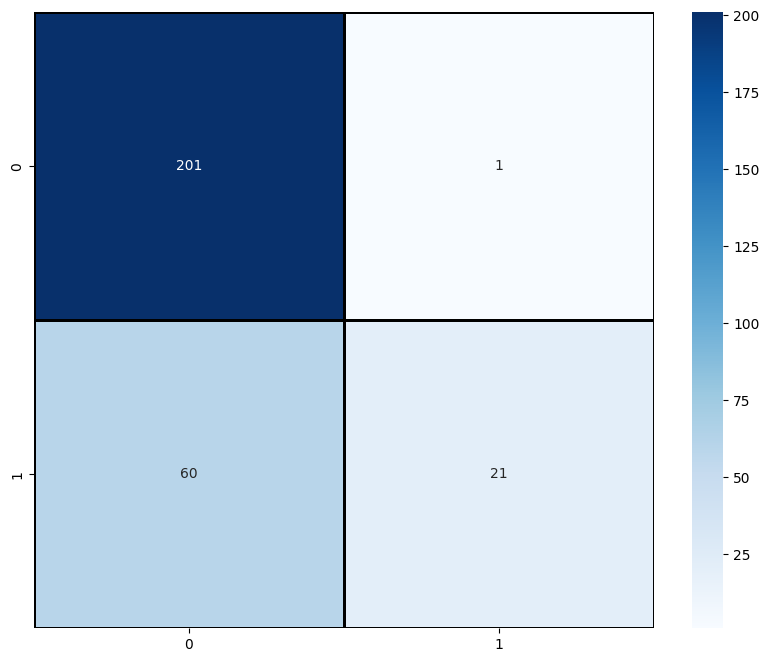

In [14]:



labels = ['Negative', 'Positive']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

In [15]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8021201413427562


In [16]:

from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.79      0.98      0.88       202
    Positive       0.86      0.37      0.52        81

    accuracy                           0.80       283
   macro avg       0.83      0.67      0.70       283
weighted avg       0.81      0.80      0.77       283



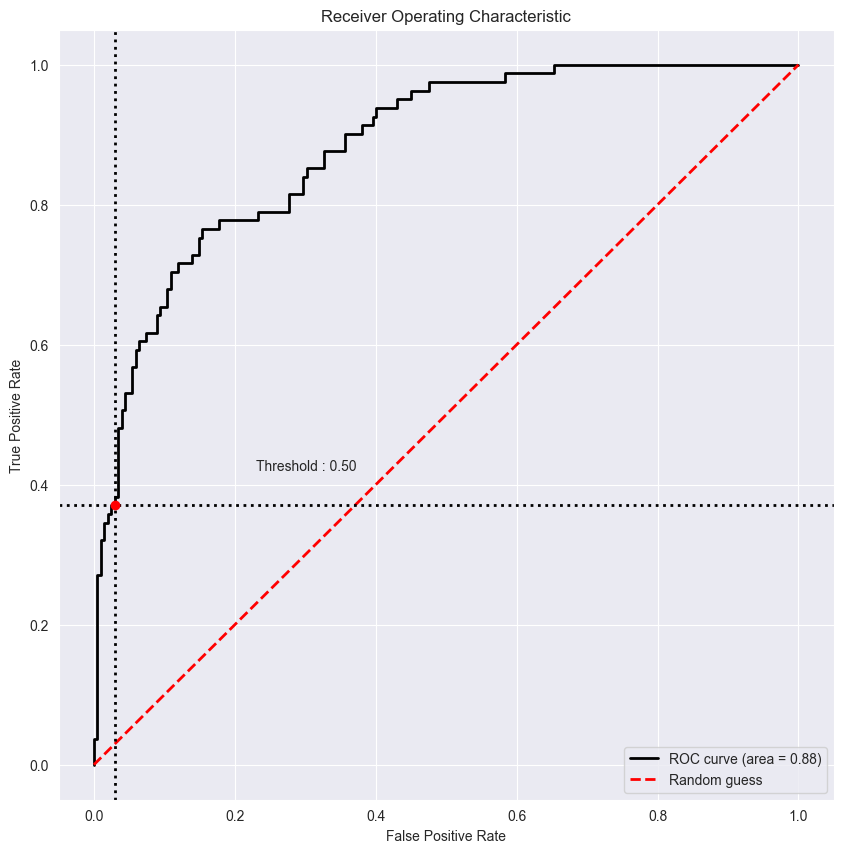

In [17]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

Text(95.72222222222221, 0.5, 'Actual')

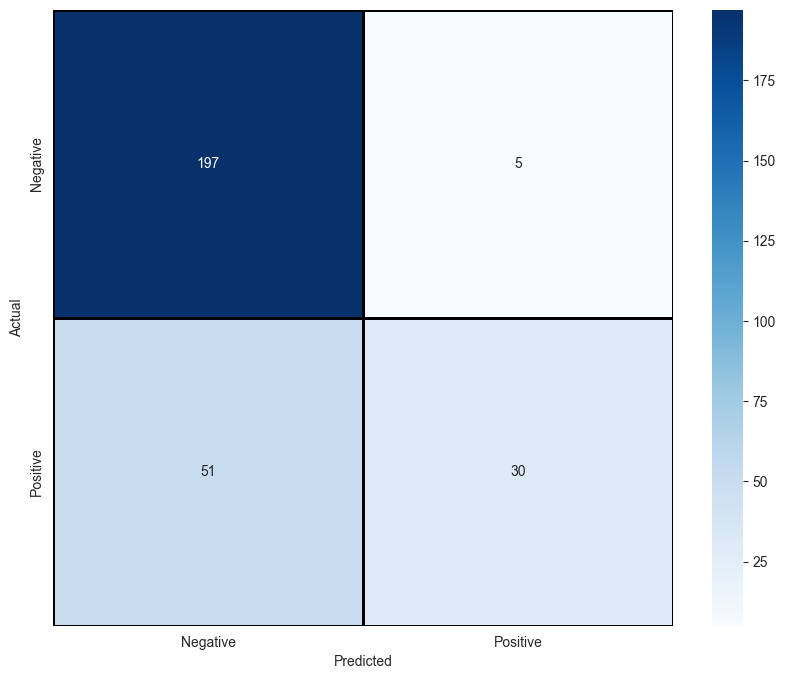

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [19]:
# PIPELINE

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [20]:

from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8220338983050848


In [21]:

from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.83      0.94      0.88       248
    Positive       0.79      0.56      0.65       106

    accuracy                           0.82       354
   macro avg       0.81      0.75      0.77       354
weighted avg       0.82      0.82      0.81       354



Text(95.72222222222221, 0.5, 'Actual')

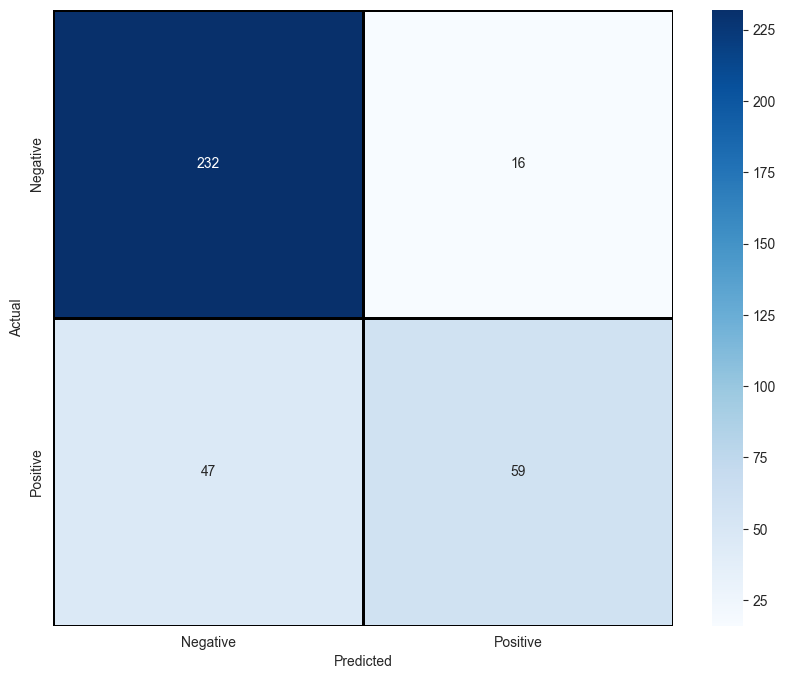

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:

# import joblib

# joblib.dump(pipe,'pipeline_classifierTF_IDF.pkl')

In [24]:
X_test[6]

'ive always been a kevin kline fan silverado fish called wanda pirates of penzance and even his hamlet on pbs great performances the minute i saw the trailer for this film i resolved to see it besides the fact that kline starred it looked like a hilarious film i got sucker punched by the trailer to an extent however as i also thought wow if theres this much funny stuff in the trailer there must be a ton of laughs in the rest of the film oops i packed up the wife and headed to les cinemas del diablo my name for our local multimultiplex the film began the film concerns an englishdrama teacher at a suburban high school named howard brackett he loves poetry and great literary works but his class is more interested in his famous former student played by matt dillon id put in his name but my wife wont let me take notes during a movie and ive forgotten it they continually interrupt his long poetic expositions with fawning questions about him brackett has been engaged to another teacher played

In [25]:
prediction = pipe.predict(['ive always been a kevin kline fan silverado fish called wanda pirates of penzance and even his hamlet on pbs great performances the minute i saw the trailer for this film i resolved to see it besides the fact that kline starred it looked like a hilarious film i got sucker punched by the trailer to an extent however as i also thought wow if theres this much funny stuff in the trailer there must be a ton of laughs in the rest of the film oops i packed up the wife and headed to les cinemas del diablo my name for our local multimultiplex the film began the film concerns an englishdrama teacher at a suburban high school named howard brackett he loves poetry and great literary works but his class is more interested in his famous former student played by matt dillon id put in his name but my wife wont let me take notes during a movie and ive forgotten it they continually interrupt his long poetic expositions with fawning questions about him brackett has been engaged to another teacher played by joan cusack for three years and has finally gotten up the gumption to marry her the wedding however becomes the big question mark of the film as this famous student of his says during the live oscar broadcast that brackett is a homosexual kline spends most of the first twothirds of the film frantically trying to convince everyone that he isnt the whole town begins to examine every detail of his life and begins to identifying all those things that confirm his sexual preference his closest friends dont help matters bringing nothing but barbara streisand laserdiscs to his stag party there are some genuinely hilarous moments one involving a tape geared towards helping men assert their masculinity kline is hounded by a gay reporter played by tom selleck who waxes poetic on the benefits of coming out while at the same time doing his best to exploit the situation for his own sleazy tabloid machinations the movie moves along fine and slowly builds to the climax of the wedding kline stands at the altar and is asked to take his vows if you want to be surprised dont read i am going to reveal the ending instead of saying i do in front of his parents and most of the town and even some cameras he says im gay this is where the movie in my opinion falls apart most of the humor in the film had come from klines insistence that he was straight while at the same time loving poetry and being a senstivie guy dressing well and occaisionally acting prissy it reminded me of the effeminate heterosexual sketch from saturday night live it was funny it was sustainably funny and klines performance made it doubly so however after the wedding the film drags on they should have attempted to come to a quick conclusion but it then gets into the serious side of what hes done he reconciles with his parents and his friends some of which had turned on him there are several scenes which seemed like a waste of time the scene with his mother and her friends which was hilarious seemed pointless and the scene with tom selleck in the bar with joan seemed pointless finally even though i am not catholic i found the scene with the priest to be condescending the preist cannot believe that a man was engaged for three years and had not consumated the relationship proclaiming to brackett in the third person hes gay it got a chuckle from the audience but i was distracted by it and began to tire of the film by the time the wedding had come and gone i found myself hoping it would be over soon much like this review you are saying overall if i have to quantify it i say rising action gets and climax and falling action gets see it in economy time'])

In [26]:
prediction

array([1])